<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/06.Chapter%2006/chapter_06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Decision Trees

Notebook ini mereproduksi dan menjelaskan isi Bab 6 dari buku _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ oleh Aurélien Géron.

Topik utama:
- Klasifikasi dengan Decision Tree
- Visualisasi pohon keputusan
- Regularisasi (max_depth, min_samples_split, dll.)
- Decision Tree untuk regresi


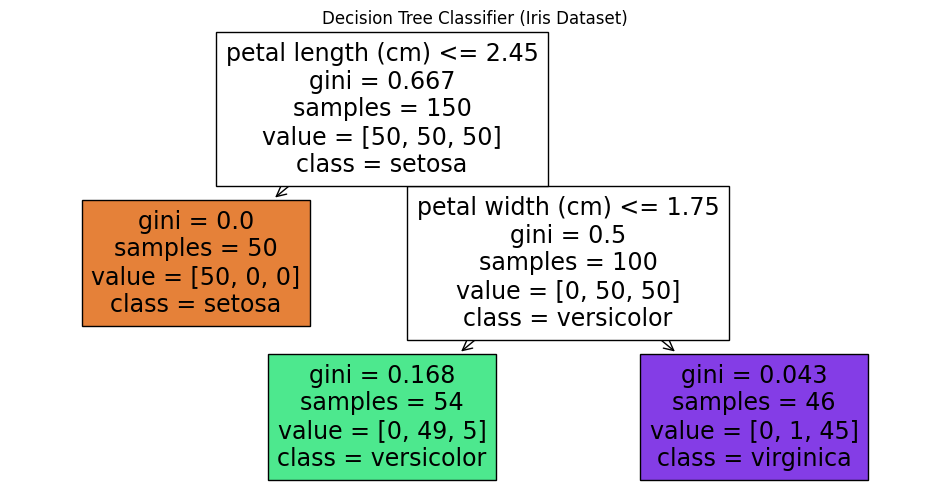

In [1]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Dataset iris
iris = load_iris()
X = iris.data[:, 2:]  # gunakan petal length & width
y = iris.target

# Latih model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Visualisasi pohon
plt.figure(figsize=(12, 6))
tree.plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.title("Decision Tree Classifier (Iris Dataset)")
plt.show()


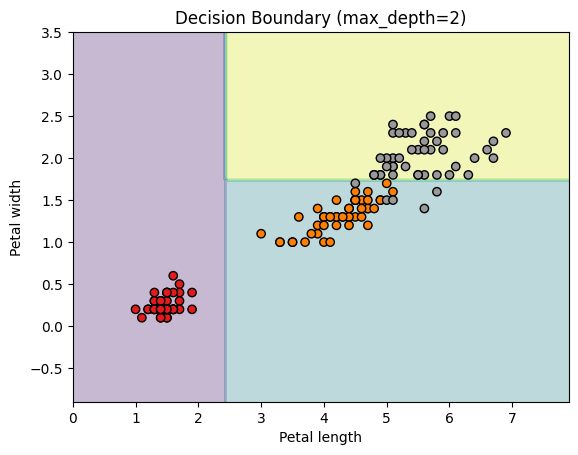

In [2]:

import numpy as np

# Visualisasi decision boundary
def plot_decision_boundary(clf, X, y, title=""):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(title)
    plt.show()

plot_decision_boundary(tree_clf, X, y, "Decision Boundary (max_depth=2)")


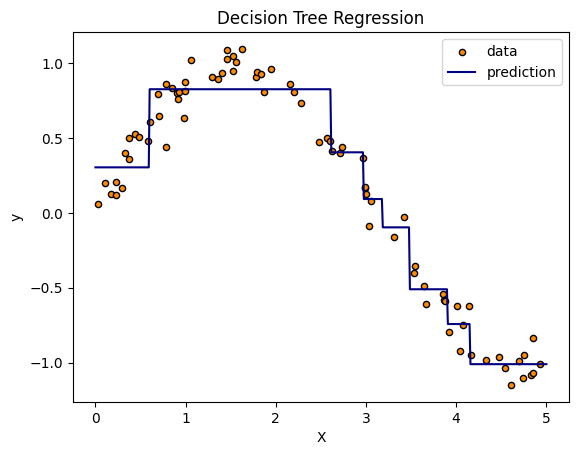

In [3]:

from sklearn.tree import DecisionTreeRegressor

# Data sederhana untuk regresi
np.random.seed(42)
X_r = np.sort(np.random.rand(80, 1) * 5, axis=0)
y_r = np.sin(X_r).ravel() + np.random.normal(0, 0.1, size=X_r.shape[0])

# Latih regresor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_r, y_r)

# Prediksi dan plot
X_test = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred = tree_reg.predict(X_test)

plt.scatter(X_r, y_r, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="navy", label="prediction")
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
